# Introduction
In this notebook, I will look deeper into Linear Regresion and the data preparation process for investigating data by regression models. 

It is part of my studying of Machine learning through the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning)

## Main objective

This notebook focuses on preparing data for regression analysis for three models - Linear, Ridge and Lasso Regression. 
I chose to analyse [Concrete data set](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength).


## Data description

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.</br> Data is in raw form (not scaled).
</br>
Number of instances (observations): 1030</br>
Number of Attributes: 9</br>
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable</br>
Missing Attribute Values: None</br>

|No|Column              |Description                                                       |Units    |
|--|--------------------|------------------------------------------------------------------|:-------:|
|01|cement             |Cement (component 1)                                              |kg in a m3 mixture   |
|02|slag             |Blast Furnace Slag (component 2)                                        |kg in a m3 mixture   |
|03|ash             |Fly Ash (component 3)                                                      |kg in a m3 mixture   |
|04|water             |Water (component 4)                                                      |kg in a m3 mixture   |
|05|superplasticizer             |Superplasticizer (component 5)        |kg in a m3 mixture   |
|06|coarse             |Coarse Aggregate (component 6)                                                     |kg in a m3 mixture   |
|07|fine             |Fine Aggregate (component 7)                                                      |kg in a m3 mixture   |
|08|age             |Age                                                     |day   |
|09|strength             |Concrete compressive strength                                                      |MPa   |


## Project methodology

#### Data cleaning   
The data set has already been prepared and cleaned.

#### Data normalization   
As I prepare this data set for regression analysis, I should normalise all data. Also, I should preserve data explainability. For this purpose, I use only simple transformations like logarithmic transformations to normalise data distributions. More information can be found in the article [Data transformation: a focus on the interpretation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7714623/) by Dong Kyu Lee.

Also I did regression analysis for non-normalised data to check the influence of normalisation.

#### Data scaling  
I use different data scaler in the piperline for each model to scale my variables to chouse the best one.

In [1]:
# Import needed libs
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # vis
import matplotlib.pyplot as plt # vis
from functools import reduce # merge several df in one action
from statsmodels.stats.outliers_influence import variance_inflation_factor # Multicollinearity analysis
import plotly.express as px # interactive plots

import statsmodels.api as sm # statistic model - OLS Regression

# Sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Find influense of eCH FEATURE
from eli5.sklearn import PermutationImportance
import eli5
from eli5.formatters import format_as_dataframe, format_as_dataframes

In [2]:
# Read df
data=pd.read_csv('../input/concrete-compressive-strength/Concrete Compressive Strength.csv')

# Info
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
# Ramane columns
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag' ,
       'Fly Ash (component 3)(kg in a m^3 mixture)': 'ash',
       'Water  (component 4)(kg in a m^3 mixture)': 'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplastcizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_agg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_agg', 
       'Age (day)': 'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'})

In [4]:
# Look at distribution of values for each variable
statistics = data.describe().T
statistics['range'] = statistics.apply(lambda row: row['max'] - row['min'], axis = 1)
statistics

,count,mean,std,min,25%,50%,75%,max,range
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000,438.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000,125.250000
superplastcizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000,32.200000
coarse_agg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000,344.000000
fine_agg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000,398.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000,364.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225,80.267417


In [5]:
# Check missing vcalues
data.isna().sum()

cement             0
slag               0
ash                0
water              0
superplastcizer    0
coarse_agg         0
fine_agg           0
age                0
strength           0
dtype: int64

In [6]:
# Reorder columns
data=data[['strength', 'cement', 'slag', 'ash', 'water', 'superplastcizer', 'coarse_agg', 'fine_agg', 'age']]

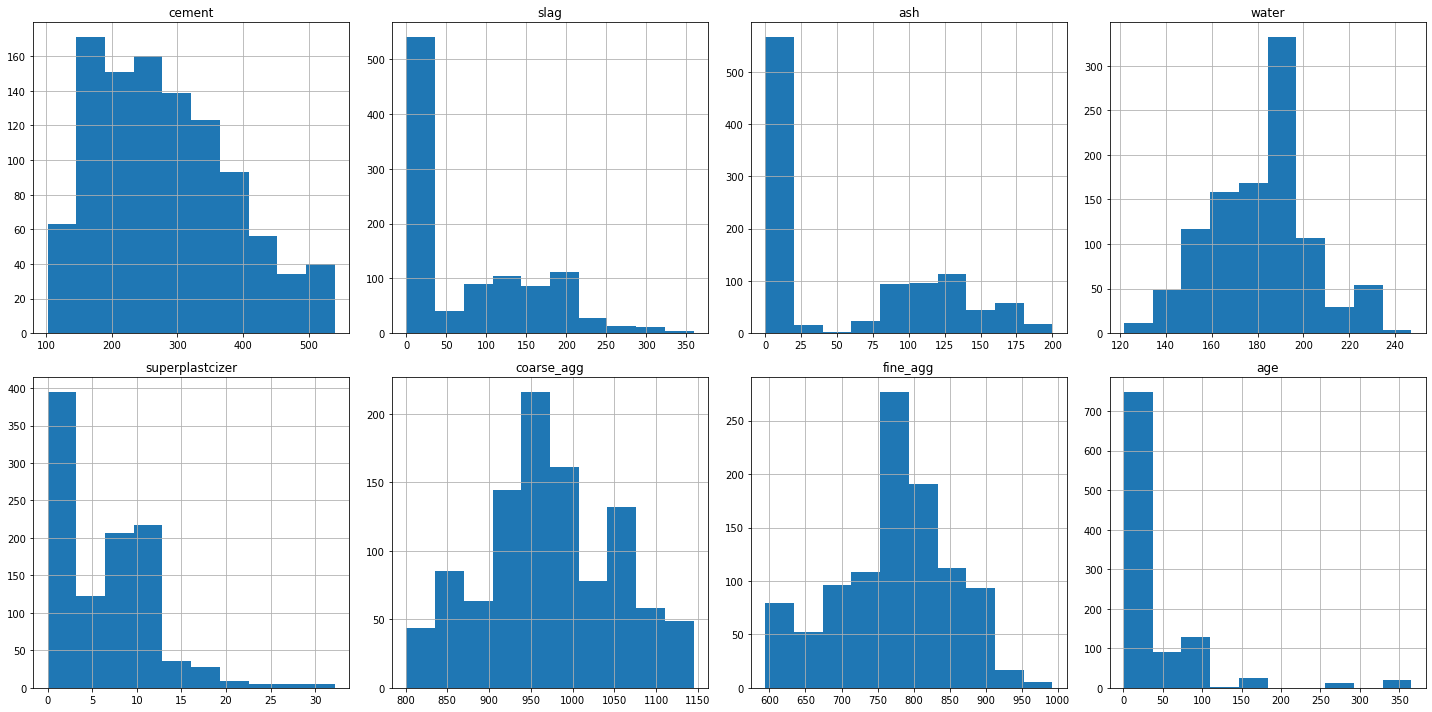

In [7]:
# Build histograms for all variables
fig, ax = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 10))

col=1 # The first columns is 'target'
for i in range(2):
    for j in range(4):
        data.hist(column = data.columns[col], bins = 10, ax=ax[i,j])
        col += 1
            
fig.tight_layout()
fig.show()

In [8]:
# Craete 2 dfs: target and variables
target=data[['strength']]
variables=data.drop(columns = 'strength')

In [9]:
# Calculate skewness scores
skewness = variables.skew(axis=0, numeric_only = True).to_dict()

# Define skewness threshold
skewness_threshold = 0.5 # If skewness by the module is less than 0.5, we say data is not skewed

# Create lists of columns that require normalizing 
# Positively and negatively skewed variables to be processed by different transformations
pos_skewed_cols = []
neg_skewed_cols = []
no_skewed_cols = []
for i in skewness:
    if abs(skewness[i]) > skewness_threshold:
        if skewness[i] > 0:
            pos_skewed_cols.append(i)
        else:
            neg_skewed_cols.append(i)
    else:
        no_skewed_cols.append(i)

# Print results
for i in pos_skewed_cols:
    print(f"Column {i} is positively skewed: score {round(skewness[i], 2)}")

print('-'*60)

for i in neg_skewed_cols:
    print(f"Column {i} is negatively skewed: score {round(skewness[i], 2)}")
    
print('-'*60)

for i in no_skewed_cols:
    print(f"Column {i} is not skewed: score {round(skewness[i], 2)}")
    
    
# add check for there ie not column in

Column cement is positively skewed: score 0.51
Column slag is positively skewed: score 0.8
Column ash is positively skewed: score 0.54
Column superplastcizer is positively skewed: score 0.91
Column age is positively skewed: score 3.27
------------------------------------------------------------
------------------------------------------------------------
Column water is not skewed: score 0.07
Column coarse_agg is not skewed: score -0.04
Column fine_agg is not skewed: score -0.25


In [10]:
# Make a df of not skewed columns

# Skewness before transformations
no_transf_dict = variables[no_skewed_cols].skew(axis=0, numeric_only = True).to_dict()
no_skew = pd.DataFrame(list(no_transf_dict.items()), columns = ['vars','skew_no_transform'])
no_skew_T = no_skew.set_index('vars').T.abs().replace(0, np.nan) 


# Selected transformation
no_skew_trans_dict = no_skew_T.idxmin().to_dict()
no_skew_ready = pd.DataFrame(list(no_skew_trans_dict.items()), columns = ['vars', 'selected_transformation'])
no_skew_trans_dict = no_skew_T.min().to_dict()
no_skew_ready = pd.merge(no_skew_ready,pd.DataFrame(list(no_skew_trans_dict.items()), columns = ['vars', 'skew_value']),on = ['vars'])          
no_skew_ready # Df of not skewed columns

,vars,selected_transformation,skew_value
0,water,skew_no_transform,0.074324
1,coarse_agg,skew_no_transform,0.040206
2,fine_agg,skew_no_transform,0.252979


In [11]:
# Create a data frame with skewness coefficients before and after different transformations to choose the ones to use
# For positively skewed variables
# All columns have values > 0. I can use even and odd roots 

# Skewness before transformations
pos_no_transf_dict = variables[pos_skewed_cols].skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.DataFrame(list(pos_no_transf_dict.items()), columns = ['vars','skew_no_transform'])

# Skewness after Logarithmic Transformation
pos_log_transf_dict = variables[pos_skewed_cols].apply(np.log1p).skew(axis=0, numeric_only = True).to_dict()
pos_skew = pd.merge(pos_skew, 
                    pd.DataFrame(list(pos_log_transf_dict.items()), columns = ['vars','skew_log_transform']), 
                    on = ['vars'])

# Transposed matrix for selecting the best transformation
pos_skew_T=pos_skew.set_index('vars').T.abs().replace(0, np.nan) 

# Selected transformation. 
pos_skew_trans_dict = pos_skew_T.idxmin().to_dict()
pos_skew_ready = pd.DataFrame(list(pos_skew_trans_dict.items()), columns = ['vars', 'selected_transformation'])
pos_skew_value_dict = pos_skew_T.min().to_dict()
pos_skew_ready = pd.merge(pos_skew_ready,pd.DataFrame(list(pos_skew_value_dict.items()), columns = ['vars', 'skew_value']),on = ['vars'])          
pos_skew_ready #df of positive skewed columns


,vars,selected_transformation,skew_value
0,cement,skew_log_transform,0.127098
1,slag,skew_log_transform,0.032692
2,ash,skew_log_transform,0.226643
3,superplastcizer,skew_log_transform,0.324634
4,age,skew_log_transform,0.005085


In [12]:
# Merge sets 
all_skew_transformed=[pos_skew_ready, no_skew_ready]
all_skew_transformed = reduce(lambda  left,right: pd.merge(left,right, how='outer'), all_skew_transformed)
all_skew_transformed['selected_transformation'] = all_skew_transformed['selected_transformation'].apply(lambda x: x[5:] )
all_skew_transformed # Df with information of skew all columns

,vars,selected_transformation,skew_value
0,cement,log_transform,0.127098
1,slag,log_transform,0.032692
2,ash,log_transform,0.226643
3,superplastcizer,log_transform,0.324634
4,age,log_transform,0.005085
5,water,no_transform,0.074324
6,coarse_agg,no_transform,0.040206
7,fine_agg,no_transform,0.252979


In [13]:
# Afte all transformations infornation about skewness
all_skew_transformed['skew_level'] = pd.cut(all_skew_transformed['skew_value'], [0, 0.5, 1, 10], labels=["no skew", "small skew", "big skew"])
all_skew_transformed['skew_level'].value_counts()

no skew       8
small skew    0
big skew      0
Name: skew_level, dtype: int64

In [14]:
# Make transformation automatically based on previous analysis
# Preparation for doing all transformation automatically
list_selected_transformation = all_skew_transformed['selected_transformation'].unique().tolist()
dict_selected_transformation = {key:[] for key in list_selected_transformation}

# Dictionary with columns names and selected transformation
for item in dict_selected_transformation.items():
    var_list = all_skew_transformed.loc[all_skew_transformed['selected_transformation'] == item[0], 'vars'].tolist()
    for i in var_list:
        item[1].append(i)


# Copy data frame into new one for transformations
vasriables_norm = variables.copy()

# function for appling transformation 
def transform(x, method):
    """"apply transformation for df """
    global res    
    if method == 'log_transform':
        res = np.log1p(x)
    elif method == 'no_transform':
        res = x 
    return res
# rename columns in data set. new names have info about performed transformation
for item in dict_selected_transformation.items():
    columns_list = item[1]
    method = item[0]
    for col in columns_list:
        vasriables_norm['{}_{}'.format(col, method)] = vasriables_norm[col].apply(lambda x: transform(x, method))
        vasriables_norm = vasriables_norm.drop(columns=[col])
vasriables_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement_log_transform           1030 non-null   float64
 1   slag_log_transform             1030 non-null   float64
 2   ash_log_transform              1030 non-null   float64
 3   superplastcizer_log_transform  1030 non-null   float64
 4   age_log_transform              1030 non-null   float64
 5   water_no_transform             1030 non-null   float64
 6   coarse_agg_no_transform        1030 non-null   float64
 7   fine_agg_no_transform          1030 non-null   float64
dtypes: float64(8)
memory usage: 64.5 KB


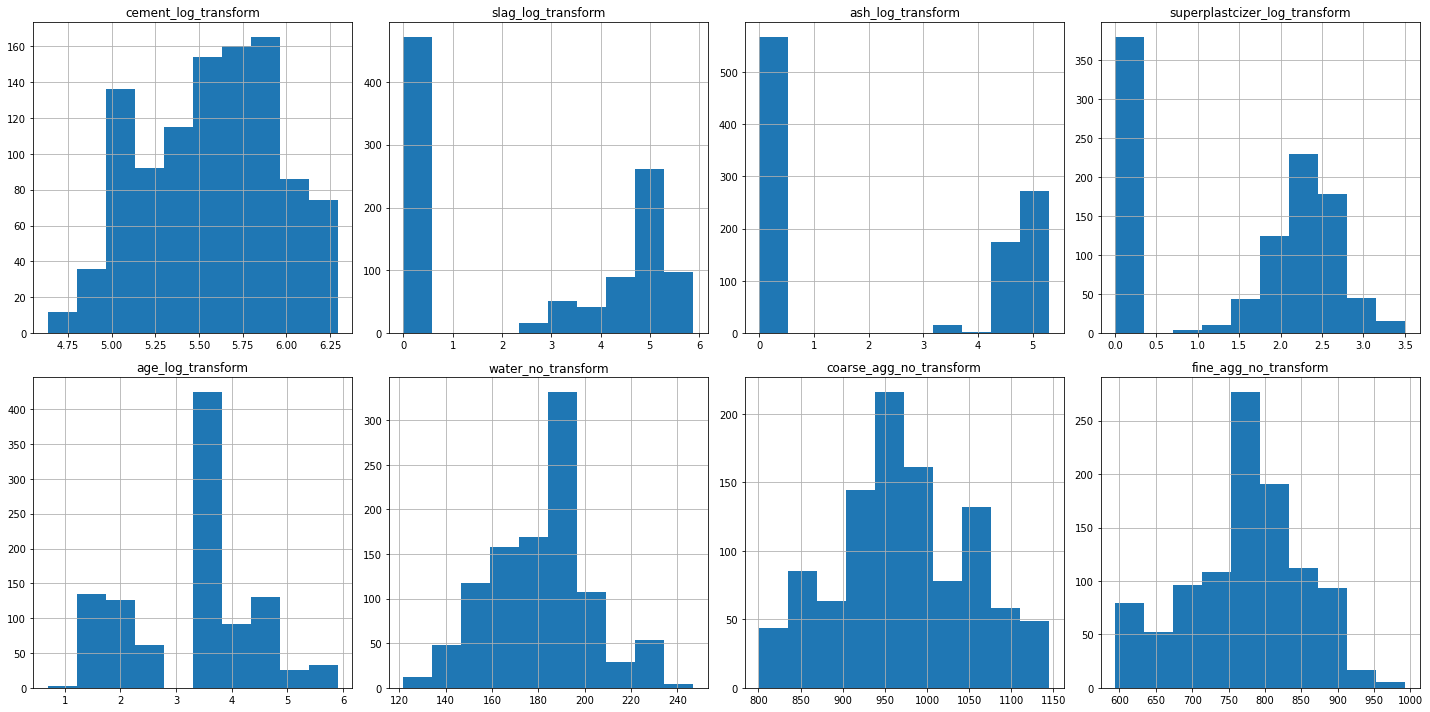

In [15]:
# Build histograms for all variables after fix skewness
fig, ax = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 10))
col=0
for i in range(2):
    for j in range(4):
        vasriables_norm.hist(column = vasriables_norm.columns[col], bins = 10, ax=ax[i,j])
        col += 1
            
fig.tight_layout()
fig.show()

In [16]:
# Joint back
df_norm_full=target.join(vasriables_norm,  how='inner') 

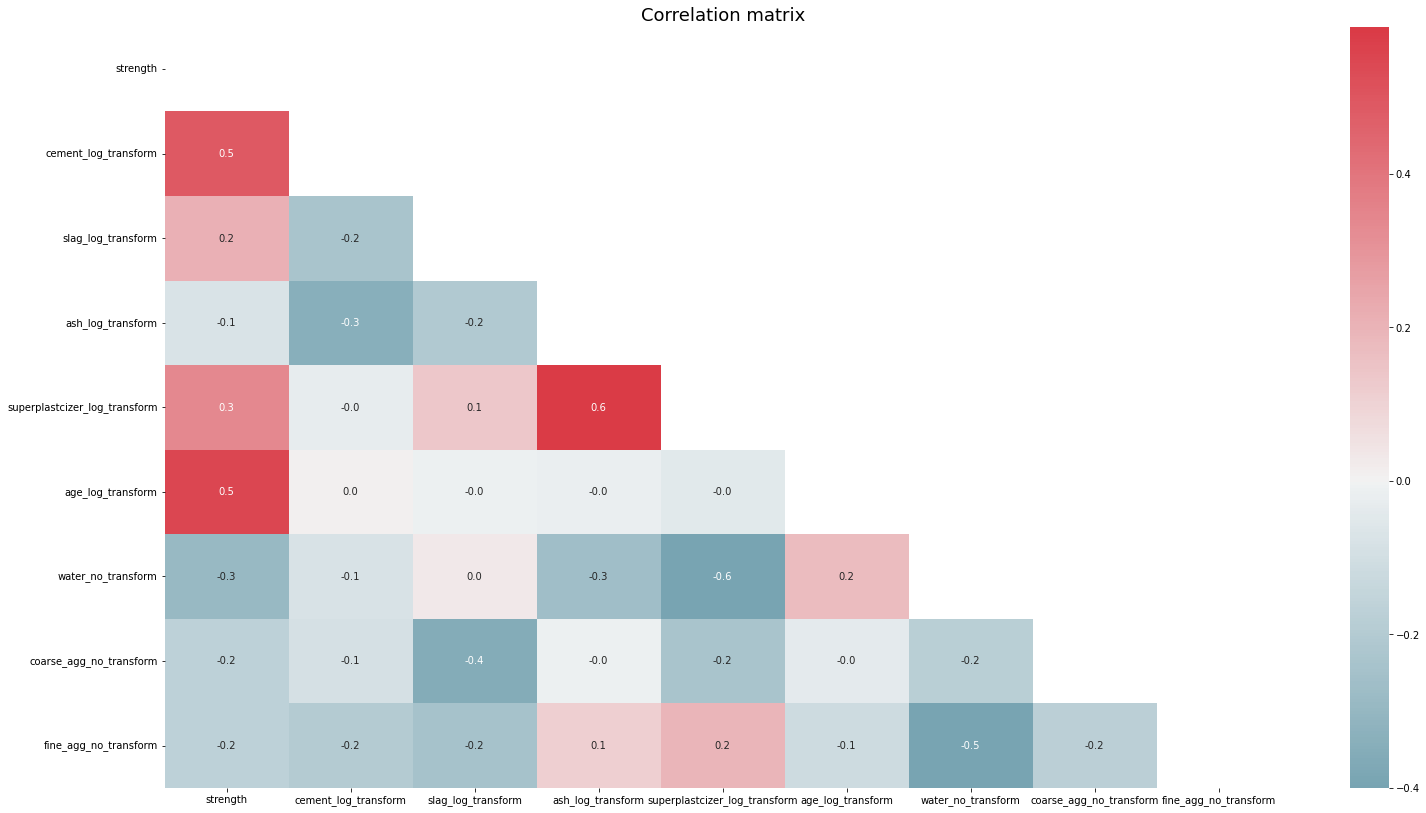

In [17]:
# Heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df_norm_full.corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df_norm_full.corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

In [18]:
# Multicollinearity analysis if data was normalized
num_cols = df_norm_full.select_dtypes(include=np.number).columns.tolist()
target = 'strength'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_norm_full[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
0,cement_log_transform,193.873098
6,coarse_agg_no_transform,112.686179
5,water_no_transform,100.809148
7,fine_agg_no_transform,69.073787
4,age_log_transform,9.907243
3,superplastcizer_log_transform,8.729108
2,ash_log_transform,4.545774
1,slag_log_transform,2.983416


In [19]:
# Сombine data on VIF and correlation with the target to decide if we should remove some of the highly correlated predicting features
corr = df_norm_full[num_cols].corr()
corr['feature'] = corr.index
VIF_and_target_corr = pd.merge(vif_data, corr[['strength', 'feature']], on = 'feature')
VIF_and_target_corr.rename(columns={"strength": "corr_with_target"}, inplace=True)
VIF_and_target_corr

,feature,VIF,corr_with_target
0,cement_log_transform,193.873098,0.490698
1,slag_log_transform,2.983416,0.211526
2,ash_log_transform,4.545774,-0.075002
3,superplastcizer_log_transform,8.729108,0.337068
4,age_log_transform,9.907243,0.549450
5,water_no_transform,100.809148,-0.289613
6,coarse_agg_no_transform,112.686179,-0.164928
7,fine_agg_no_transform,69.073787,-0.167249


In [20]:
# Create a scatter plot for Variance Inflation Factor vs Correlation with target
fig = px.scatter(VIF_and_target_corr, x="VIF", y="corr_with_target",
                 width=800, height=500,
                 hover_data = VIF_and_target_corr[['feature']],
                 labels={
                     "VIF": "Variance Inflation Factor",
                     "corr_with_target": "Correlation with target"
                 },
                 title='Feature usefulness: Variance Inflation Factor vs Correlation with target',
                 trendline_color_override="black")
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


In [21]:
# Scale features for OLS Regression
df_norm_scaled = df_norm_full.copy()
s = MinMaxScaler()
df_norm_scaled[features] = s.fit_transform(df_norm_scaled[features])

# Look at scaled variables
df_norm_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225
cement_log_transform,1030.0,0.565330,0.228730,0.000000,0.379755,0.589642,0.739172,1.000000
slag_log_transform,1030.0,0.433780,0.409654,0.000000,0.000000,0.532594,0.844112,1.000000
ash_log_transform,1030.0,0.403177,0.447809,0.000000,0.000000,0.000000,0.901502,1.000000
superplastcizer_log_transform,1030.0,0.415338,0.329743,0.000000,0.000000,0.569499,0.688737,1.000000
age_log_transform,1030.0,0.489311,0.213156,0.000000,0.266110,0.513323,0.643039,1.000000
water_no_transform,1030.0,0.477576,0.170504,0.000000,0.344511,0.504990,0.560878,1.000000
coarse_agg_no_transform,1030.0,0.499763,0.226029,0.000000,0.380814,0.485465,0.663953,1.000000
fine_agg_no_transform,1030.0,0.450524,0.201143,0.000000,0.343578,0.465404,0.577020,1.000000


In [22]:
# Get features and target
X = df_norm_scaled[features]
Y = df_norm_scaled[target]

# Add constant for OLS Regression
X = sm.add_constant(X)

# Build OLS Regression model
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# Look at summary
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     531.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:35:03   Log-Likelihood:                -3515.7
No. Observations:                1030   AIC:                             7049.
Df Residuals:                    1021   BIC:                             7094.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Models

In [23]:

# Get features and target for sklearn regression models
X_data = df_norm_full[features]
y_data = df_norm_full[target]

# Split data into train and test sets
# I will do cross validation and model tuning on the train set and then calculate scores for tuned models on the test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=2)

# Define function that will split train dataset for cross-validation
kf = KFold(shuffle = True, random_state=11, n_splits = 5)

### Linear Regression

In [24]:
# Estimator 
estimator_lr = Pipeline([("scaler", 'passthrough'),
               ("polynomial_features", PolynomialFeatures()),
               ("linear_regression", LinearRegression())])

# Parameters for Grid Search
params_lr = {
    'polynomial_features__degree': [1, 2, 3],
    'scaler': [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler()]
}

# Grid Search
grid_lr = GridSearchCV(estimator_lr, params_lr, cv=kf, scoring='neg_median_absolute_error', n_jobs = -1)
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('scaler', 'passthrough'),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'scaler': [MinMaxScaler(), MaxAbsScaler(),
                                    RobustScaler(), StandardScaler()]},
             scoring='neg_median_absolute_error')

In [25]:
# Tuned model
grid_lr.best_score_, grid_lr.best_params_

(-2.9364538796030493,
 {'polynomial_features__degree': 3, 'scaler': MinMaxScaler()})

In [26]:
# Save best parameters to use in model stability evaluation
lr_best_pf = grid_lr.best_params_['polynomial_features__degree']
lr_best_sc = grid_lr.best_params_['scaler']

In [27]:
# Predict target values for test set using Linear Regression model
y_predict_lr = grid_lr.predict(X_test)

# calculate R2 score
lr_r2 = r2_score(y_test, y_predict_lr)

# calculate mean absolute error
lr_mae = mean_absolute_error(y_test, y_predict_lr)

# create data frame for scores and add scores for Linear Regression model
scores = pd.DataFrame(data = {'model': ['linear_regression'],  
                              'mae_train': [-grid_lr.best_score_],
                              'mae_test': [lr_mae],
                              'r2_test': [lr_r2]})
scores

,model,mae_train,mae_test,r2_test
0,linear_regression,2.936454,3.911838,0.883287


Text(0, 0.5, 'Predicted Strength')

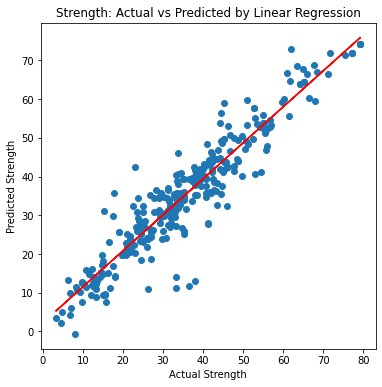

In [28]:
# Visualize predicted vs actual target values
plt.figure(figsize=(6, 6))
plt.scatter(x = y_test, 
            y = y_predict_lr)
z = np.polyfit(y_test, y_predict_lr, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r-")
plt.title("Strength: Actual vs Predicted by Linear Regression")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")

In [29]:
# Use eli5 to find feature influence
perm_lr = PermutationImportance(grid_lr, scoring='neg_median_absolute_error', random_state=101).fit(X_test, y_test)
explainer_lr = eli5.show_weights(perm_lr, feature_names = X_test.columns.tolist())
result_lr = pd.read_html(explainer_lr.data)[0] # read data from HTML provided by eli5.show_weights
result_lr=result_lr.T
result_lr.columns = result_lr.iloc[1] # second row to column names
result_lr = result_lr.drop(result_lr.index[1]).reset_index().rename(columns={"index": "model"}).replace('Weight', 'Linear Regression')# drop second row 
result_lr = result_lr.rename_axis(None, axis=1)
result_lr

,model,age_log_transform,slag_log_transform,cement_log_transform,ash_log_transform,water_no_transform,fine_agg_no_transform,coarse_agg_no_transform,superplastcizer_log_transform
0,Linear Regression,8.0525 ± 0.4965,7.0832 ± 1.7456,6.5077 ± 0.4864,5.2680 ± 0.1914,5.1426 ± 1.6952,3.5949 ± 0.5136,3.3294 ± 0.3686,2.9738 ± 0.3382


### Ridge Regression

In [30]:
# Estimator 
estimator_rr = Pipeline([("scaler", 'passthrough'),
               ("polynomial_features", PolynomialFeatures()),
               ("ridge_regression", Ridge())])

# Parameters for Grid Search
params_rr = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.1, 20, 20),
    'scaler': [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler()]
}


# Grid Search
grid_rr = GridSearchCV(estimator_rr, params_rr, cv=kf, scoring='neg_median_absolute_error', n_jobs = -1)
grid_rr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('scaler', 'passthrough'),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 0.1       ,  0.13216207,  0.17466814,  0.23084503,  0.30508957,
        0.40321271,  0.53289427,  0.70428412,  0.93079649,  1.23015993,
        1.62580486,  2.14869741,  2.83976304,  3.7530897 ,  4.96016115,
        6.55545179,  8.66382098, 11.45028541, 15.13293455, 20.        ]),
                         'scaler': [MinMaxScaler(), MaxAbsScaler(),
                                    RobustScaler(), StandardScaler()]},
             scoring='neg_median_absolute_error')

In [31]:
# Tuned model
grid_rr.best_score_, grid_rr.best_params_

(-2.8438950722502576,
 {'polynomial_features__degree': 3,
  'ridge_regression__alpha': 0.30508957470615816,
  'scaler': StandardScaler()})

In [32]:
# Save best parameters to use in model stability evaluation
rr_best_pf = grid_rr.best_params_['polynomial_features__degree']
rr_best_sc = grid_rr.best_params_['scaler']
rr_best_alfa = grid_rr.best_params_['ridge_regression__alpha']

In [33]:
# Predict target values for test set using Ridge Regression model
y_predict_rr = grid_rr.predict(X_test)

# Calculate R2 score
rr_r2 = r2_score(y_test, y_predict_rr)

# Calculate mean absolute error
rr_mae = mean_absolute_error(y_test, y_predict_rr)

scores = scores.append({'model' : 'ridge_regression', 
                       'mae_train' : -grid_rr.best_score_,
                       'mae_test' : rr_mae,
                       'r2_test' : rr_r2},
                       ignore_index = True)

scores

,model,mae_train,mae_test,r2_test
0,linear_regression,2.936454,3.911838,0.883287
1,ridge_regression,2.843895,3.775305,0.899977


Text(0, 0.5, 'Predicted Strength')

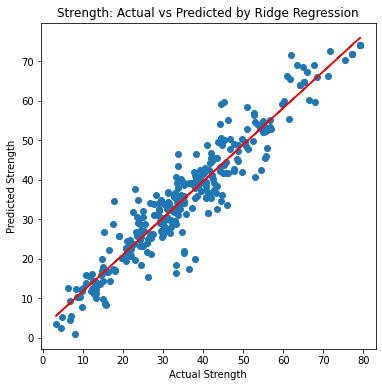

In [34]:
# Visualize predicted vs actual target values
plt.figure(figsize=(6, 6))
plt.scatter(x = y_test, 
            y = y_predict_rr)
z = np.polyfit(y_test, y_predict_rr, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r-")
plt.title("Strength: Actual vs Predicted by Ridge Regression")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")

In [35]:
# Use eli5 to find feature influence
perm_rr = PermutationImportance(grid_rr, scoring='neg_median_absolute_error', random_state=101).fit(X_test, y_test)
explainer_rr = eli5.show_weights(perm_rr, feature_names = X_test.columns.tolist())
result_rr = pd.read_html(explainer_rr.data)[0] # read data from HTML provided by eli5.show_weights
result_rr=result_rr.T
result_rr.columns = result_rr.iloc[1] # second row to column names
result_rr = result_rr.drop(result_rr.index[1]).reset_index().rename(columns={"index": "model"}).replace('Weight', 'Ridge Regression')# drop second row 
result_rr = result_rr.rename_axis(None, axis=1)
result_rr


,model,age_log_transform,cement_log_transform,slag_log_transform,ash_log_transform,water_no_transform,coarse_agg_no_transform,superplastcizer_log_transform,fine_agg_no_transform
0,Ridge Regression,7.9460 ± 0.8451,7.4501 ± 1.3666,7.1705 ± 1.9287,4.7097 ± 0.9630,4.1343 ± 0.9843,3.0216 ± 0.6328,2.6037 ± 0.1319,2.3776 ± 0.1433


### Lasso Regression

In [36]:
# Estimator 
estimator_lsr = Pipeline([("scaler", 'passthrough'),
                        ("polynomial_features", PolynomialFeatures()),
                        ("lasso_regression", Lasso(max_iter = 100000))])

# Parameters for Grid Search
params_lsr = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.01, 1, 20),
#     'max_iter': [100000], I don't understand why it should be in the "estimator"
    'scaler': [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler()]}


# Grid Search
grid_lsr = GridSearchCV(estimator_lsr, params_lsr, cv=kf, scoring='neg_median_absolute_error', n_jobs = -1)
grid_lsr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('scaler', 'passthrough'),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression',
                                        Lasso(max_iter=100000))]),
             n_jobs=-1,
             param_grid={'lasso_regression__alpha': array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         'polynomial_features__degree': [1, 2, 3],
                         'scaler': [MinMaxScaler(), MaxAbsScaler(),
                                    RobustScaler(), StandardScaler()]},
             scoring='neg_median_absolute_error')

In [37]:
# Tuned model
grid_lsr.best_score_, grid_lsr.best_params_

(-2.846408782990258,
 {'lasso_regression__alpha': 0.012742749857031334,
  'polynomial_features__degree': 3,
  'scaler': StandardScaler()})

In [38]:
# Save best parameters to use in model stability evaluation
lsr_best_pf = grid_lsr.best_params_['polynomial_features__degree']
lsr_best_sc = grid_lsr.best_params_['scaler']
lsr_best_alfa = grid_lsr.best_params_['lasso_regression__alpha']

In [39]:
# Predict target values for test set using Lasso Regression model
y_predict_lsr = grid_lsr.predict(X_test)

# calculate R2 score
lsr_r2 = r2_score(y_test, y_predict_lsr)

# calculate mean absolute error
lsr_mae = mean_absolute_error(y_test, y_predict_lsr)

scores = scores.append({'model' : 'lasso_regression', 
                       'mae_train' : -grid_lsr.best_score_,
                       'mae_test' : lsr_mae,
                       'r2_test' : lsr_r2},
                       ignore_index = True)

scores

,model,mae_train,mae_test,r2_test
0,linear_regression,2.936454,3.911838,0.883287
1,ridge_regression,2.843895,3.775305,0.899977
2,lasso_regression,2.846409,3.631780,0.903310


Text(0, 0.5, 'Predicted Strength')

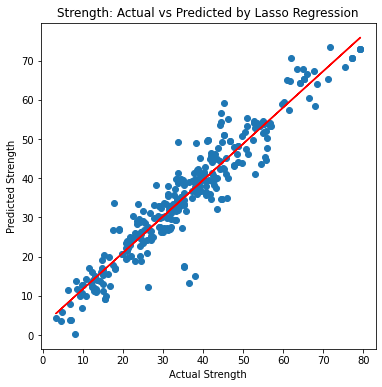

In [40]:
# Visualize predicted vs actual target values
plt.figure(figsize=(6, 6))
plt.scatter(x = y_test, 
            y = y_predict_lsr)
z = np.polyfit(y_test, y_predict_lsr, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r-")
plt.title("Strength: Actual vs Predicted by Lasso Regression")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")

In [41]:
# Use eli5 to find feature influence
perm_lsr = PermutationImportance(grid_lsr, scoring='neg_median_absolute_error', random_state=101).fit(X_test, y_test)
explainer_lsr = eli5.show_weights(perm_lsr, feature_names = X_test.columns.tolist())
result_lsr = pd.read_html(explainer_lsr.data)[0] # read data from HTML provided by eli5.show_weights
result_lsr=result_lsr.T
result_lsr.columns = result_lsr.iloc[1] # second row to column names
result_lsr = result_lsr.drop(result_lsr.index[1]).reset_index().rename(columns={"index": "model"}).replace('Weight', 'Lasso Regression')# drop second row 
result_lsr = result_lsr.rename_axis(None, axis=1)
result_lsr

,model,cement_log_transform,age_log_transform,slag_log_transform,water_no_transform,ash_log_transform,coarse_agg_no_transform,superplastcizer_log_transform,fine_agg_no_transform
0,Lasso Regression,8.4578 ± 0.5784,7.8069 ± 1.1512,6.1161 ± 1.1838,3.6170 ± 1.0092,2.2391 ± 0.6614,1.7849 ± 0.6364,1.5879 ± 0.1519,1.5742 ± 0.3681


In [42]:
# Merge all result's df
result = pd.concat([result_lr, result_rr, result_lsr], join="outer", ignore_index=True)

columns = [i for i in result.columns if i not in ["model"]]
for col in columns:
    result[col] = result[col].str.replace(' ', '') # Delet spases in sells
    # Split columns to value and error
    new_columns = result[col].str.split("±", n = 1, expand = True)
    result[col]= new_columns[0]
    result[col+'_error']=new_columns[1]
# Reorder columns
result = result[['model', 'age_log_transform', 'age_log_transform_error', 'slag_log_transform', 'slag_log_transform_error',
                 'cement_log_transform', 'cement_log_transform_error', 'ash_log_transform', 'ash_log_transform_error',
                 'water_no_transform', 'water_no_transform_error', 'fine_agg_no_transform', 'fine_agg_no_transform_error',
                 'coarse_agg_no_transform', 'coarse_agg_no_transform_error', 'superplastcizer_log_transform', 'superplastcizer_log_transform_error']]

result

,model,age_log_transform,age_log_transform_error,slag_log_transform,slag_log_transform_error,cement_log_transform,cement_log_transform_error,ash_log_transform,ash_log_transform_error,water_no_transform,water_no_transform_error,fine_agg_no_transform,fine_agg_no_transform_error,coarse_agg_no_transform,coarse_agg_no_transform_error,superplastcizer_log_transform,superplastcizer_log_transform_error
0,Linear Regression,8.0525,0.4965,7.0832,1.7456,6.5077,0.4864,5.2680,0.1914,5.1426,1.6952,3.5949,0.5136,3.3294,0.3686,2.9738,0.3382
1,Ridge Regression,7.9460,0.8451,7.1705,1.9287,7.4501,1.3666,4.7097,0.9630,4.1343,0.9843,2.3776,0.1433,3.0216,0.6328,2.6037,0.1319
2,Lasso Regression,7.8069,1.1512,6.1161,1.1838,8.4578,0.5784,2.2391,0.6614,3.6170,1.0092,1.5742,0.3681,1.7849,0.6364,1.5879,0.1519


In [43]:
# Create new table 
result=result.T
result.columns = result.iloc[0] # first row to column names
result = result.drop(result.index[0]).reset_index().rename(columns={"index": "feature"})
result = result.rename_axis(None, axis=1)
columns = [i for i in result.columns if i not in ["feature"]]


In [44]:
# Change all possible column types to 'int/float'
for col in columns:    
    result[col] = pd.to_numeric(result[col], errors='ignore')  

In [45]:
# Find three most influential features of each model
for col in columns:
    print(col)
    tmp = result[col].nlargest(3)
    for i,v in zip(tmp.index.tolist(),tmp):
        print(result['feature'][i], v)
    print('-'*40)

Linear Regression
age_log_transform 8.0525
slag_log_transform 7.0832
cement_log_transform 6.5077
----------------------------------------
Ridge Regression
age_log_transform 7.946
cement_log_transform 7.4501
slag_log_transform 7.1705
----------------------------------------
Lasso Regression
cement_log_transform 8.4578
age_log_transform 7.8069
slag_log_transform 6.1161
----------------------------------------


Above there are the three most influential features of each model. </br>
All of them are identical but have a slightly different levels of impact. </br>
Age_log_transform is the most impactful feature. 

-------
The best model is Lasso Regresiion with r^2 0.9

--------------

A possible next steps are: 
1. collecting more data to improve Adj. R-squared up to 0.99 for better prediction.
2. use feature importance to find the influence of ^2 and more power parameters.

## No normalization

I found VIF for no normalised data less than for the normalised data. Just to check how normalization influences on the result of linear regression models I performed calculations for standard Linear Regression and Lasso Regression. 

In [46]:
# Multicollinearity analysis if data was not normalized
num_cols = data.select_dtypes(include=np.number).columns.tolist()
target = 'strength'
features = [x for x in num_cols if x != target]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features
  
# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data[features].values, i)
                          for i in range(len(features))]

vif_data.sort_values('VIF', ascending = False)

,feature,VIF
5,coarse_agg,84.959460
3,water,82.150840
6,fine_agg,72.795397
0,cement,15.468620
4,superplastcizer,5.472391
2,ash,4.148893
1,slag,3.330359
7,age,1.699430


In [47]:
# Combine data on VIF and correlation with the target to decide if we should remove some of the highly correlated predicting features
corr = data[num_cols].corr()
corr['feature'] = corr.index
VIF_and_target_corr = pd.merge(vif_data, corr[['strength', 'feature']], on = 'feature')
VIF_and_target_corr.rename(columns={"strength": "corr_with_target"}, inplace=True)
VIF_and_target_corr

,feature,VIF,corr_with_target
0,cement,15.468620,0.497833
1,slag,3.330359,0.134824
2,ash,4.148893,-0.105753
3,water,82.150840,-0.289613
4,superplastcizer,5.472391,0.366102
5,coarse_agg,84.959460,-0.164928
6,fine_agg,72.795397,-0.167249
7,age,1.699430,0.328877


In [48]:
# Create a scatter plot for Variance Inflation Factor vs Correlation with target
fig = px.scatter(VIF_and_target_corr, x="VIF", y="corr_with_target",
                 width=800, height=500,
                 hover_data = VIF_and_target_corr[['feature']],
                 labels={
                     "VIF": "Variance Inflation Factor",
                     "corr_with_target": "Correlation with target"
                 },
                 title='Feature usefulness: Variance Inflation Factor vs Correlation with target',
                 trendline_color_override="black")
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [49]:
# Scale features for OLS Regression
df_scaled = data.copy()
s = MinMaxScaler()
df_scaled[features] = s.fit_transform(df_scaled[features])

# Look at scaled variables
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225
cement,1030.0,0.409054,0.238601,0.000000,0.206336,0.390183,0.566210,1.000000
slag,1030.0,0.205608,0.240064,0.000000,0.000000,0.061213,0.397746,1.000000
ash,1030.0,0.270800,0.319822,0.000000,0.000000,0.000000,0.591054,1.000000
water,1030.0,0.477576,0.170504,0.000000,0.344511,0.504990,0.560878,1.000000
superplastcizer,1030.0,0.192643,0.185512,0.000000,0.000000,0.197205,0.315528,1.000000
coarse_agg,1030.0,0.499763,0.226029,0.000000,0.380814,0.485465,0.663953,1.000000
fine_agg,1030.0,0.450524,0.201143,0.000000,0.343578,0.465404,0.577020,1.000000
age,1030.0,0.122698,0.173544,0.000000,0.016484,0.074176,0.151099,1.000000


In [50]:
# Get features and target
X = df_scaled[features]
Y = df_scaled[target]

# Add constant for OLS Regression
X = sm.add_constant(X)

# Build OLS Regression model
model_n = sm.OLS(Y, X).fit()
predictions_n = model.predict(X) 

# Look at summary
print_model = model_n.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.76e-206
Time:                        11:35:19   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7163      8.284     

Adj. R-squared for no normalised data (0.612) smaller than for the normalised data (0.805). </br>


### Linear Regression

In [51]:
# Get features and target for sklearn regression models
X_data_nn = data[features]
y_data_nn = data[target]

# Split data into train and test sets
# I will do cross validation and model tuning on the train set and then calculate scores for tuned models on the test set
X_train, X_test, y_train, y_test = train_test_split(X_data_nn, y_data_nn, test_size=0.3, random_state=2)

# Estimator 
estimator_lr_nn = Pipeline([("scaler", 'passthrough'),
                          ("polynomial_features", PolynomialFeatures()),
                          ("linear_regression", LinearRegression())])

# Parameters for Grid Search
params_lr_nn = {'polynomial_features__degree': [1, 2, 3],
                'scaler': [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler()]}

# Grid Search
grid_lr_nn = GridSearchCV(estimator_lr_nn, params_lr_nn, cv=kf, scoring='neg_median_absolute_error', n_jobs = -1)
grid_lr_nn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('scaler', 'passthrough'),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'scaler': [MinMaxScaler(), MaxAbsScaler(),
                                    RobustScaler(), StandardScaler()]},
             scoring='neg_median_absolute_error')

In [52]:
# Tuned model
grid_lr_nn.best_score_, grid_lr_nn.best_params_

(-3.837690709275047,
 {'polynomial_features__degree': 3, 'scaler': StandardScaler()})

In [53]:
# Predict target values for test set using Linear Regression model
y_predict_lr_nn = grid_lr_nn.predict(X_test)

# calculate R2 score
lr_nn_r2 = r2_score(y_test, y_predict_lr_nn)

# calculate mean absolute error
lr_nn_mae = mean_absolute_error(y_test, y_predict_lr_nn)

# create data frame for scores and add scores for Linear Regression model
scores = scores.append({'model' : 'linear_regression_nn',  
                        'mae_train' : -grid_lr_nn.best_score_,
                        'mae_test' : lr_nn_mae,
                        'r2_test' : lr_nn_r2},
                        ignore_index = True)
scores

,model,mae_train,mae_test,r2_test
0,linear_regression,2.936454,3.911838,0.883287
1,ridge_regression,2.843895,3.775305,0.899977
2,lasso_regression,2.846409,3.631780,0.903310
3,linear_regression_nn,3.837691,5.009742,0.799127


Text(0, 0.5, 'Predicted Strength')

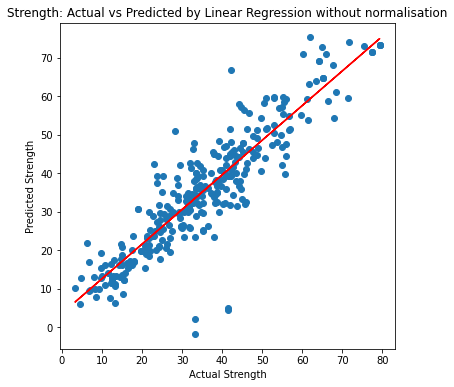

In [54]:
# Visualize predicted vs actual target values
plt.figure(figsize=(6, 6))
plt.scatter(x = y_test, 
            y = y_predict_lr_nn)
z = np.polyfit(y_test, y_predict_lr_nn, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r-")
plt.title("Strength: Actual vs Predicted by Linear Regression without normalisation")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")

### Lasso Regresion

In [55]:
# Estimator 
estimator_lsr_nn = Pipeline([("scaler", 'passthrough'),
                            ("polynomial_features", PolynomialFeatures()),
                            ("lasso_regression", Lasso(max_iter = 100000))])

# Parameters for Grid Search
params_lsr_nn = {'polynomial_features__degree': [1, 2, 3],
                 'lasso_regression__alpha': np.geomspace(0.01, 1, 20),
              # 'max_iter': [100000], I don't understand why it should be in the "estimator"
                'scaler': [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), StandardScaler()]}


# Grid Search
grid_lsr_nn = GridSearchCV(estimator_lsr_nn, params_lsr_nn, cv=kf, scoring='neg_median_absolute_error', n_jobs = -1)
grid_lsr_nn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('scaler', 'passthrough'),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression',
                                        Lasso(max_iter=100000))]),
             n_jobs=-1,
             param_grid={'lasso_regression__alpha': array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         'polynomial_features__degree': [1, 2, 3],
                         'scaler': [MinMaxScaler(), MaxAbsScaler(),
                                    RobustScaler(), StandardScaler()]},
             scoring='neg_median_absolute_error')

In [56]:
# Tuned model
grid_lsr_nn.best_score_, grid_lsr_nn.best_params_

(-3.5039136115944145,
 {'lasso_regression__alpha': 0.0206913808111479,
  'polynomial_features__degree': 3,
  'scaler': StandardScaler()})

In [57]:
# Save best parameters to use in model stability evaluation
lsr_nn_best_pf = grid_lsr_nn.best_params_['polynomial_features__degree']
lsr_nn_best_sc = grid_lsr_nn.best_params_['scaler']
lsr_nn_best_alfa = grid_lsr_nn.best_params_['lasso_regression__alpha']

In [58]:
# Predict target values for test set using Lasso Regression model
y_predict_lsr_nn = grid_lsr_nn.predict(X_test)

# calculate R2 score
lsr_nn_r2 = r2_score(y_test, y_predict_lsr_nn)

# calculate mean absolute error
lsr_nn_mae = mean_absolute_error(y_test, y_predict_lsr_nn)

scores = scores.append({'model' : 'lasso_regression_nn', 
                       'mae_train' : -grid_lsr_nn.best_score_,
                       'mae_test' : lsr_nn_mae,
                       'r2_test' : lsr_nn_r2},
                       ignore_index = True)

scores

,model,mae_train,mae_test,r2_test
0,linear_regression,2.936454,3.911838,0.883287
1,ridge_regression,2.843895,3.775305,0.899977
2,lasso_regression,2.846409,3.631780,0.903310
3,linear_regression_nn,3.837691,5.009742,0.799127
4,lasso_regression_nn,3.503914,4.396636,0.869155


It is clear to see the best r2_test score for non-normilised data (Lasso Regression 0.87) is worse than the worst result for normalised data (Linear regresion 0.88).</br>
This means we should use normalised data even if they have bigger VIF. 

Text(0, 0.5, 'Predicted Strength')

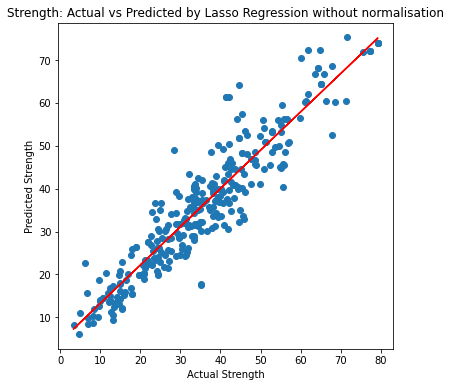

In [59]:
# Visualize predicted vs actual target values
plt.figure(figsize=(6, 6))
plt.scatter(x = y_test, 
            y = y_predict_lsr_nn)
z = np.polyfit(y_test, y_predict_lsr_nn, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r-")
plt.title("Strength: Actual vs Predicted by Lasso Regression without normalisation")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")

<p style="text-align: center; font-weight: 700;"> 
Thank you for reading!<br />
Since I am only at the beginning of my Data Science studying,<br /> 
any kind of feedback (positive or negative) is greatly appreciated.

</p>